Epoch 1/100
141/141 - 2s - loss: 0.0608 - 2s/epoch - 11ms/step
Epoch 2/100
141/141 - 0s - loss: 0.0133 - 328ms/epoch - 2ms/step
Epoch 3/100
141/141 - 0s - loss: 0.0094 - 324ms/epoch - 2ms/step
Epoch 4/100
141/141 - 0s - loss: 0.0100 - 312ms/epoch - 2ms/step
Epoch 5/100
141/141 - 0s - loss: 0.0085 - 323ms/epoch - 2ms/step
Epoch 6/100
141/141 - 0s - loss: 0.0092 - 293ms/epoch - 2ms/step
Epoch 7/100
141/141 - 0s - loss: 0.0077 - 306ms/epoch - 2ms/step
Epoch 8/100
141/141 - 0s - loss: 0.0076 - 298ms/epoch - 2ms/step
Epoch 9/100
141/141 - 0s - loss: 0.0075 - 321ms/epoch - 2ms/step
Epoch 10/100
141/141 - 0s - loss: 0.0079 - 295ms/epoch - 2ms/step
Epoch 11/100
141/141 - 0s - loss: 0.0068 - 306ms/epoch - 2ms/step
Epoch 12/100
141/141 - 0s - loss: 0.0065 - 331ms/epoch - 2ms/step
Epoch 13/100
141/141 - 0s - loss: 0.0064 - 293ms/epoch - 2ms/step
Epoch 14/100
141/141 - 0s - loss: 0.0068 - 298ms/epoch - 2ms/step
Epoch 15/100
141/141 - 0s - loss: 0.0060 - 326ms/epoch - 2ms/step
Epoch 16/100
141/141 

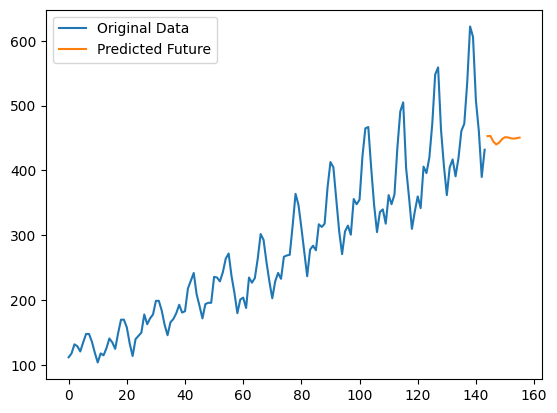

In [ ]:
  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load and prepare the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

# Function to create dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Prepare data
look_back = 3
X, Y = create_dataset(dataset_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# Generate predictions for the next N future time steps
future_steps = 12
future_predictions = []

# Initialize the sequence with the last part of the dataset
new_input = dataset_scaled[-look_back:]

for _ in range(future_steps):
    # Reshape and predict the next step
    new_input_reshaped = new_input.reshape(1, look_back, 1)
    next_pred = model.predict(new_input_reshaped)

    # Append the prediction
    future_predictions.append(next_pred[0, 0])

    # Update the sequence
    new_input = np.append(new_input[1:], next_pred, axis=0)

# Invert the predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot the results
plt.plot(dataframe.values, label='Original Data')
plt.plot(range(len(dataframe), len(dataframe) + future_steps), future_predictions, label='Predicted Future')
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 40ms/step


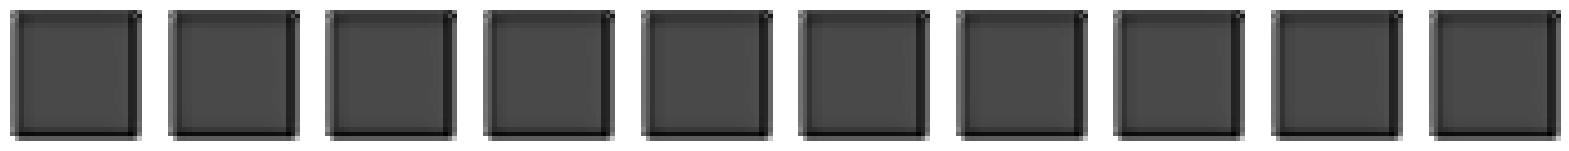

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, _), _ = mnist.load_data()
train_images = np.expand_dims(train_images, -1).astype('float32') / 255.0

# Define the PixelCNN model
input_shape = train_images.shape[1:]
inputs = Input(shape=input_shape)
x = inputs

# PixelCNN layers
for _ in range(15):
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

# Final Convolution layer
x = Conv2D(1, (1, 1), padding='same', activation='sigmoid')(x)

model = Model(inputs, outputs=x)
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
model.fit(train_images, train_images, epochs=10, batch_size=64)

# Function to generate new images
def generate_images(model, num_images):
    generated_images = []
    for _ in range(num_images):
        image = np.zeros((28, 28, 1), dtype='float32')
        for i in range(28):
            for j in range(28):
                new_pixel = model.predict(image[np.newaxis, :, :, :])[0, i, j, 0]
                image[i, j, 0] = new_pixel
        generated_images.append(image)
    return generated_images

# Generate and plot new images
new_images = generate_images(model, 10)
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for img, ax in zip(new_images, axes):
    ax.imshow(img.squeeze(), cmap='gray')
    ax.axis('off')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, Activation, BatchNormalization, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Load and preprocess MNIST dataset
(train_images, _), (_, _) = mnist.load_data()
train_images = np.expand_dims(train_images, -1).astype('float32') / 255.0

# Define the PixelCNN model
input_shape = train_images.shape[1:]
inputs = Input(shape=input_shape)

x = Conv2D(32, (7, 7), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

for _ in range(15):
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

x = Conv2D(1, (1, 1), padding='same', activation='sigmoid')(x)

model = Model(inputs, x)
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy())

# Train the model
model.fit(train_images, train_images, epochs=50, batch_size=64, verbose=1)

# Function to generate new images
def generate_images(model, num_images):
    generated_images = []
    for _ in range(num_images):
        image = np.zeros((28, 28, 1), dtype='float32')
        for i in range(28):
            for j in range(28):
                new_pixel = model.predict(image[np.newaxis, :, :, :])[0, i, j, 0]
                image[i, j, 0] = new_pixel
        generated_images.append(image)
    return generated_images

# Generate and plot new images
new_images = generate_images(model, 10)
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for img, ax in zip(new_images, axes):
    ax.imshow(img.squeeze(), cmap='gray')
    ax.axis('off')
plt.show()


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
938/938 [==============================] - 1709s 2s/step - loss: 0.0871
Epoch 2/50
938/938 [==============================] - 1642s 2s/step - loss: 0.0601
Epoch 3/50
938/938 [==============================] - 1646s 2s/step - loss: 0.0592
Epoch 4/50
938/938 [==============================] - 1632s 2s/step - loss: 0.0589
Epoch 5/50
938/938 [==============================] - 1652s 2s/step - loss: 0.0588
Epoch 6/50
938/938 [==============================] - 1632s 2s/step - loss: 0.0587
Epoch 7/50
938/938 [==============================] - 1654s 2s/step - loss: 0.0586
Epoch 8/50
938/938 [==============================] - 1628s 2s/step - loss: 0.0586
Epoch 9/50
938/938 [==============================] - 1659s 2s/step - loss: 0.0586
Epoch 10/50
938/938 [==============================] - 1644s 2s/step - loss: 0.0585
Epoch 11/50
938/938 [==============================] - 1641s 2s/step - loss: 0.0585
Epoch 12/50
938/938 

Epoch: 1, Reconstruction Error: 0.15074646472930908
Epoch: 2, Reconstruction Error: 0.1264272779226303
Epoch: 3, Reconstruction Error: 0.11534035205841064
Epoch: 4, Reconstruction Error: 0.11020004749298096
Epoch: 5, Reconstruction Error: 0.10762500762939453
Epoch: 6, Reconstruction Error: 0.0993412509560585
Epoch: 7, Reconstruction Error: 0.1006682738661766
Epoch: 8, Reconstruction Error: 0.09696844965219498
Epoch: 9, Reconstruction Error: 0.09258254617452621
Epoch: 10, Reconstruction Error: 0.09267393499612808


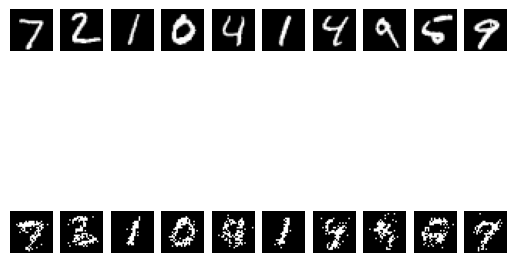

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()
train_images = train_images.reshape(-1, 28 * 28).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28 * 28).astype('float32') / 255.0

class RBM:
    def __init__(self, visible_dim, hidden_dim):
        # Initialize weights and biases with tf.float32 type
        self.W = tf.Variable(tf.random.normal([visible_dim, hidden_dim], stddev=0.01, dtype=tf.float32))
        self.vb = tf.Variable(tf.zeros([visible_dim], dtype=tf.float32))
        self.hb = tf.Variable(tf.zeros([hidden_dim], dtype=tf.float32))

    def sample_hidden(self, visible):
        # Sample from hidden given visible
        hidden_activation = tf.matmul(visible, self.W) + self.hb
        hidden_prob = tf.nn.sigmoid(hidden_activation)
        return tf.nn.relu(tf.sign(hidden_prob - tf.random.uniform(tf.shape(hidden_prob), dtype=tf.float32)))

    def sample_visible(self, hidden):
        # Sample from visible given hidden
        visible_activation = tf.matmul(hidden, tf.transpose(self.W)) + self.vb
        visible_prob = tf.nn.sigmoid(visible_activation)
        return tf.nn.relu(tf.sign(visible_prob - tf.random.uniform(tf.shape(visible_prob), dtype=tf.float32)))

    def train(self, data, lr=0.01, batch_size=100, epochs=5):
        for epoch in range(epochs):
            for i in range(0, data.shape[0], batch_size):
                batch = data[i:i+batch_size]
                v0 = tf.cast(batch, tf.float32)

                # Gibbs Sampling
                h0 = self.sample_hidden(v0)
                v1 = self.sample_visible(h0)
                h1 = self.sample_hidden(v1)

                # Update rules
                w_update = tf.matmul(tf.transpose(v0), h0) - tf.matmul(tf.transpose(v1), h1)
                vb_update = tf.reduce_sum(v0 - v1, 0)
                hb_update = tf.reduce_sum(h0 - h1, 0)

                # Apply updates
                self.W.assign_add(lr * w_update / batch_size)
                self.vb.assign_add(lr * vb_update / batch_size)
                self.hb.assign_add(lr * hb_update / batch_size)

            # Compute error (optional, for monitoring)
            error = tf.reduce_mean(tf.square(v0 - v1))
            print(f'Epoch: {epoch + 1}, Reconstruction Error: {error.numpy()}')

# Initialize RBM model
visible_dim = 784  # 28*28 pixels for MNIST
hidden_dim = 64    # Number of hidden units
rbm = RBM(visible_dim, hidden_dim)

# Train the model
rbm.train(train_images, epochs=10)

# Visualize the results (optional)
def show_reconstructed_images(model, data, n_images=10):
    original = data[:n_images]
    reconstructed = model.sample_visible(model.sample_hidden(original))
    for i in range(n_images):
        plt.subplot(2, n_images, i + 1)
        plt.imshow(original[i].reshape((28, 28)), cmap='gray')
        plt.axis('off')
        plt.subplot(2, n_images, n_images + i + 1)
        plt.imshow(reconstructed[i].numpy().reshape((28, 28)), cmap='gray')
        plt.axis('off')
    plt.show()

show_reconstructed_images(rbm, test_images)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

class DeepEBM(tf.keras.Model):
    def __init__(self):
        super(DeepEBM, self).__init__()
        self.network = tf.keras.Sequential([
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1)
        ])

    def call(self, x):
        return self.network(x)

def contrastive_divergence_loss(model, real_images, fake_images):
    real_loss = tf.reduce_mean(model(real_images))
    fake_loss = tf.reduce_mean(tf.nn.softplus(model(fake_images)))
    return real_loss - fake_loss

# Load and preprocess MNIST dataset
(train_images, _), _ = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0

# Create a TensorFlow Dataset object
batch_size = 64
dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

# Model and optimizer
model = DeepEBM()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

@tf.function
def train_step(model, real_images, optimizer):
    fake_images = tf.random.normal(shape=real_images.shape)
    with tf.GradientTape() as tape:
        loss = contrastive_divergence_loss(model, real_images, fake_images)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Training loop
epochs = 20  # Increased number of epochs
for epoch in range(epochs):
    for real_images in dataset:
        loss = train_step(model, real_images, optimizer)
    print(f'Epoch {epoch}, Loss: {loss.numpy()}')

def generate_images(model, num_samples, steps=300, step_size=0.005):  # Adjusted Langevin Dynamics
    samples = tf.random.normal(shape=(num_samples, 28, 28, 1))
    for _ in range(steps):
        with tf.GradientTape() as tape:
            tape.watch(samples)
            energy = model(samples)
        grads = tape.gradient(energy, samples)
        samples -= step_size * grads
        samples += tf.random.normal(shape=samples.shape) * np.sqrt(2 * step_size)
    return samples

# Generate and visualize images
num_samples = 10
generated_images = generate_images(model, num_samples)

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()


11490434/11490434 [==============================] - 0s 0us/step
Epoch 0, Loss: -3320509104128.0
Epoch 1, Loss: -552366952677376.0
Epoch 2, Loss: -1.0170989363068928e+16
Epoch 3, Loss: -7.65432922416087e+16
Epoch 4, Loss: -3.6267954541900595e+17
Epoch 5, Loss: -1.241976448898564e+18
Epoch 6, Loss: -3.596620731955282e+18
Epoch 7, Loss: -8.945503458283225e+18
Epoch 8, Loss: -2.009225998169958e+19
Epoch 9, Loss: -4.222793153729528e+19
Epoch 10, Loss: -8.089650644096804e+19
Epoch 11, Loss: -1.5301686939870246e+20
Epoch 12, Loss: -2.671844569586839e+20


Instructions for updating:
`masked_autoregressive_default_template` is deprecated; use `tfp.bijectors.AutoregressiveNetwork`.   Also, please note the section "Variable Tracking" in the documentation for `tfp.bijectors.MaskedAutoregressiveFlow`.


Epoch 0 Loss: 2.7054760456085205
Epoch 1 Loss: 2.7054760456085205
Epoch 2 Loss: 2.7054760456085205
Epoch 3 Loss: 2.7054760456085205
Epoch 4 Loss: 2.7054760456085205
Epoch 5 Loss: 2.7054760456085205
Epoch 6 Loss: 2.7054760456085205
Epoch 7 Loss: 2.7054760456085205
Epoch 8 Loss: 2.7054760456085205
Epoch 9 Loss: 2.7054760456085205
Epoch 10 Loss: 2.7054760456085205
Epoch 11 Loss: 2.7054760456085205
Epoch 12 Loss: 2.7054760456085205
Epoch 13 Loss: 2.7054760456085205
Epoch 14 Loss: 2.7054760456085205
Epoch 15 Loss: 2.7054760456085205
Epoch 16 Loss: 2.7054760456085205
Epoch 17 Loss: 2.7054760456085205
Epoch 18 Loss: 2.7054760456085205
Epoch 19 Loss: 2.7054760456085205
Epoch 20 Loss: 2.7054760456085205
Epoch 21 Loss: 2.7054760456085205
Epoch 22 Loss: 2.7054760456085205
Epoch 23 Loss: 2.7054760456085205
Epoch 24 Loss: 2.7054760456085205
Epoch 25 Loss: 2.7054760456085205
Epoch 26 Loss: 2.7054760456085205
Epoch 27 Loss: 2.7054760456085205
Epoch 28 Loss: 2.7054760456085205
Epoch 29 Loss: 2.7054760

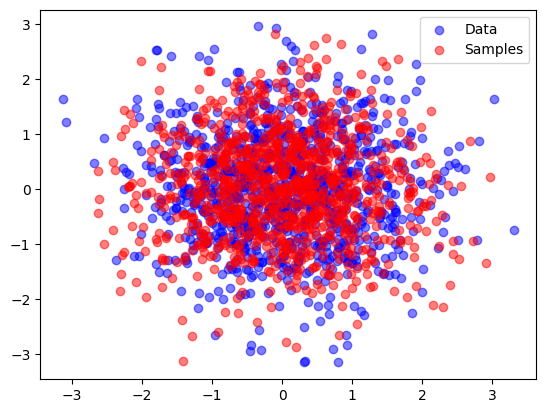

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

# Define a base distribution of the same dimensionality as our data.
# Here we'll use a multivariate normal distribution.
D = 2  # Dimensionality of the data.
base_distribution = tfd.MultivariateNormalDiag(loc=tf.zeros(D))

# Define a chain of normalizing flows.
num_flows = 5  # Number of flow layers.
flow_bijectors = []

for i in range(num_flows):
    flow_bijectors.append(tfb.MaskedAutoregressiveFlow(
        shift_and_log_scale_fn=tfb.masked_autoregressive_default_template(hidden_layers=[512, 512])
    ))
    flow_bijectors.append(tfb.Permute(permutation=[1, 0]))  # Swap dimensions for better mixing

# Combine the flows into a single chain.
normalizing_flow_bijector = tfb.Chain(list(reversed(flow_bijectors)))

# Construct the Normalizing Flow Model as a TransformedDistribution.
normalizing_flow = tfd.TransformedDistribution(
    distribution=base_distribution,
    bijector=normalizing_flow_bijector
)

# Define a training dataset.
# Here we're using a dummy dataset. Replace this with your actual data.
data = tf.random.normal((1000, D))

# Define the training parameters.
optimizer = tf.optimizers.Adam(learning_rate=1e-4)
num_epochs = 100
batch_size = 100
num_batches = data.shape[0] // batch_size

# Training loop.
for epoch in range(num_epochs):
    for batch in range(num_batches):
        batch_data = data[batch * batch_size:(batch + 1) * batch_size]
        with tf.GradientTape() as tape:
            loss = -tf.reduce_mean(normalizing_flow.log_prob(batch_data))
        gradients = tape.gradient(loss, normalizing_flow.trainable_variables)
        optimizer.apply_gradients(zip(gradients, normalizing_flow.trainable_variables))
    print(f"Epoch {epoch} Loss: {loss}")

# Sample from the trained Normalizing Flow Model.
samples = normalizing_flow.sample(1000)

# Plot the samples and data for comparison (if in 2D)
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5, label='Data')
plt.scatter(samples[:, 0], samples[:, 1], color='red', alpha=0.5, label='Samples')
plt.legend()
plt.show()



In [ ]:
#Implementation of RealNVP

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# Affine coupling layer
def create_coupling(input_shape):
    input = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(input)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(input_shape[-1], 3, padding='same')(x)
    return Model(input, x)

# RealNVP Model
class RealNVP(tf.keras.Model):
    def __init__(self, num_couplings, input_shape):
        super(RealNVP, self).__init__()
        self.num_couplings = num_couplings
        self.input_shape = input_shape
        self.couplings = [create_coupling(input_shape) for _ in range(num_couplings)]

    def call(self, x):
        for i in range(self.num_couplings):
            x1, x2 = tf.split(x, num_or_size_splits=2, axis=-1)
            x2 = x2 + self.couplings[i](x1)
            x = tf.concat([x1, x2], axis=-1)
        return x

# Initialize the model
input_shape = (28, 28, 1)  # Simplified input shape for grayscale images
num_couplings = 4
model = RealNVP(num_couplings=num_couplings, input_shape=input_shape)

# Dummy training data (Random noise as an example)
train_data = np.random.rand(1000, 28, 28, 1).astype('float32')

# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(train_data, train_data, epochs=5, batch_size=32)


AttributeError: ignored

In [ ]:
!pip install realnvp
import realnvp

# Import the model
model = realnvp.RealNVP()

# Generate samples from the model
samples = model.sample(1000)

# Plot the samples
plt.imshow(samples[0, :, :, 0], cmap='gray')
plt.show()

# Calculate the log probability of the samples
log_prob = model.log_prob(samples)

# Print the mean and standard deviation of the log probabilities
print(f"Mean log prob: {np.mean(log_prob)}")
print(f"Std dev log prob: {np.std(log_prob)}")

ERROR: Could not find a version that satisfies the requirement realnvp (from versions: none)
ERROR: No matching distribution found for realnvp


ModuleNotFoundError: ignored

In [ ]:
!git clone https://github.com/openai/realnvp.git

Cloning into 'realnvp'...
fatal: could not read Username for 'https://github.com': No such device or address
